In [19]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy

## Exercice 1

First we need to generate the data. We will use the make moons dataset creation tool from sklearn to create our dataset.

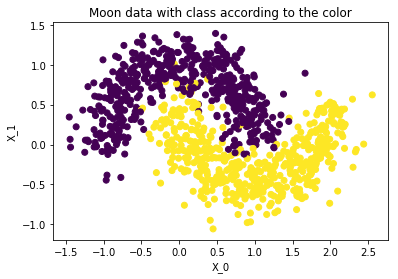

In [176]:
# generate data
noise = 0.2
n_samples = 1000
percent_test = 0.2
X, y = sklearn.datasets.make_moons(n_samples=n_samples, shuffle=True, noise=noise)
# X, y = sklearn.datasets.make_blobs(n_samples=n_samples, shuffle=True, centers=2, cluster_std=7)

# divide test and train dataset
idx_sep = int(n_samples*percent_test)
X_train, y_train = X[idx_sep:,:], y[idx_sep:]
X_test, y_test = X[:idx_sep,:], y[:idx_sep]

# visualize data
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Moon data with class according to the color")
plt.xlabel("X_0")
plt.ylabel("X_1")
plt.show()

### Logistic Regression

We will perform a logistic regression to create a model that fit the data and that is capable of classify the data.

The model is $y = \sigma(\omega^T \tilde{X})$. $\sigma$ is the logistic function $\sigma(x) = \dfrac{1}{1+\exp(-x)}$. $\omega \in \mathbb{R}^3$ is the parameter we wish to find. $\tilde{X} = [X, 1]^T$ where $X \in \mathbb{R}^2$. So when the model is trained, we can give an input $X$ and the model returns us the probability that the point belongs to the first class. How do we train the model ?

We wish to maximize the posterior distribution :

$p(\omega | X, y) \quad \alpha \quad p(y | X, \omega) p(\omega)$

We have $p(y | X, \omega) = \displaystyle \prod_{i=1}^N p(y_i | \omega, X_i) = \displaystyle \prod_{i=1}^N p(i \in C_1 | \omega, X_i)^{y_i} p(i \in C_2 | \omega, X_i)^{1-y_i} = \displaystyle \prod_{i=1}^N \sigma(\omega^T \tilde{X_i})^{y_i} (1-\sigma(\omega^T \tilde{X_i}))^{1-y_i}$

We suppose a prior of the following form : 

$p(\omega) = \dfrac{1}{64}  \mathbb{1}_{[-2, 2]^3}(\omega)$ this just put constraint to the possible values of $\omega$.

We want to minimize $NLL(\omega) = -\log(p(\omega | X, y)) \equiv - \displaystyle \sum_{i=1}^N y_i \log(\sigma(\omega^T \tilde{X_i})) + (1-y_i)(\log(1-\sigma(\omega^T \tilde{X_i})))$ with the constraint we have seen before.

In [83]:
def toXtilde(X):
    X_tilde = np.zeros((X.shape[0], X.shape[1]+1))
    for i in range(0, X_tilde.shape[0]):
        X_tilde[i] = [X[i, 0], X[i, 1], 1]
    return X_tilde

In [84]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [163]:
def nll(omega, X, y):
    n_samples_X = X.shape[0]
    array_sum = np.zeros(n_samples_X)
    epsilon = 10**(-8)
    for i in range(0, n_samples_X):
        # w0*X0 + w1*X1 + w2
        sigmoid_value = sigmoid(np.matmul(omega[:2], X[i,:].T) + omega[2])
        array_sum[i] = y[i]*np.log(sigmoid_value+epsilon) + (1-y[i])*np.log(1-sigmoid_value+epsilon)
    nll = - np.sum(array_sum)
    return nll

In [164]:
def jac_nll(omega, X, y):
    n_samples_X = X.shape[0]
    jac_nll = np.zeros(3)
    epsilon = 10**(-8)
    for i in range(0, n_samples_X):
        # w0*X0 + w1*X1 + w2
        sigmoid_value = sigmoid(np.matmul(omega[:2], X[i,:].T) + omega[2])
        jac_nll += (sigmoid_value - y[i])*np.array([X[i,0], X[i,1], 1])
    return jac_nll

In [177]:
initial_guess_omega = [0.5, 1.3, 1]
result_opt = scipy.optimize.minimize(fun=nll, 
                                     jac=jac_nll,
                                     x0=initial_guess_omega, 
                                     args=(X_train, y_train), 
                                     method="L-BFGS-B")
#                                      bounds=[(-2, 2), (-10, 10), (-2, -2)])
omega_opt = result_opt.x
print("omega opt :", omega_opt)

omega opt : [ 1.31864312 -5.13547983  0.57776113]


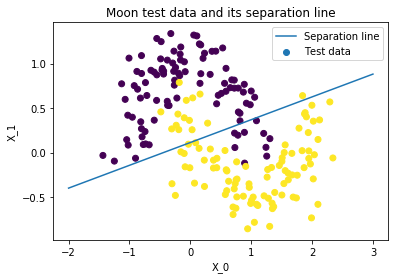

In [181]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, label="Test data")
t = np.linspace(-2, 3, 2)
plt.plot(t, -t*omega_opt[0]/omega_opt[1]-omega_opt[2]/omega_opt[1], label="Separation line")
plt.legend()
plt.title("Moon test data and its separation line")
plt.xlabel("X_0")
plt.ylabel("X_1")
plt.show()